## Customer Churn Prediction

One of the most important applications of data science in the commercial sector is churn prediction. Its popularity stems from the fact that its impacts are more tangible to comprehend, and it plays a significant role in the company's overall revenues.

Churn is described as "when a client cancels a subscription to a service they have been utilizing" in business terms. People canceling Spotify/Netflix memberships are a regular example. So, based on their utilization of the service, Churn Prediction is effectively projecting which clients are most likely to cancel a subscription, i.e. 'leave a company.'

From a business standpoint, obtaining this information is critical because recruiting new clients is generally more difficult and costly than retaining existing customers. As a result, the information acquired through Churn Prediction allows them to focus more on the customers who are most likely to leave.

### Goals

- What features are significant in prediction the churn in a customer.
- To suggest measure in order to improve the retention rate with respect to customer category.

> 1 = Churned <br>
> 0 = Not Churned 


#### Importing required packages

In [1]:
import numpy as np #linear algebra
import pandas as pd #data processing

import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization

import warnings
warnings.filterwarnings("ignore") #to ignore the warnings


from sklearn.model_selection import train_test_split

#for model building
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


- As we can see there are no Null values, the data is pretty clean. So, we don't need to perform imputation of any values in the Dataset.

In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## EDA
### Univariate

No handles with labels found to put in legend.


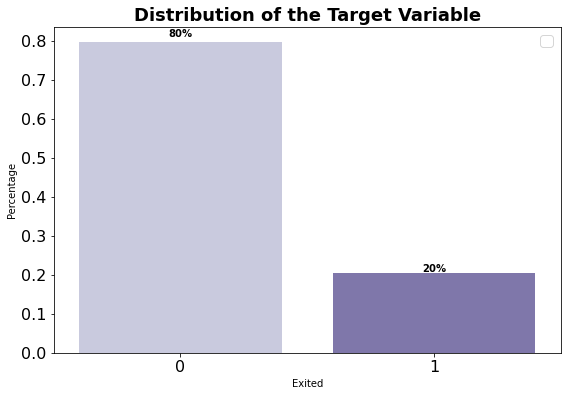

In [272]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df['Exited'].value_counts(normalize = True).rename_axis('Exited').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'Exited', y = 'Percentage', data = eda_percentage, palette = 'Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Distribution of the Target Variable', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)


#### No problem but we can apply over and under sampling to check if our model accuracy improves

No handles with labels found to put in legend.


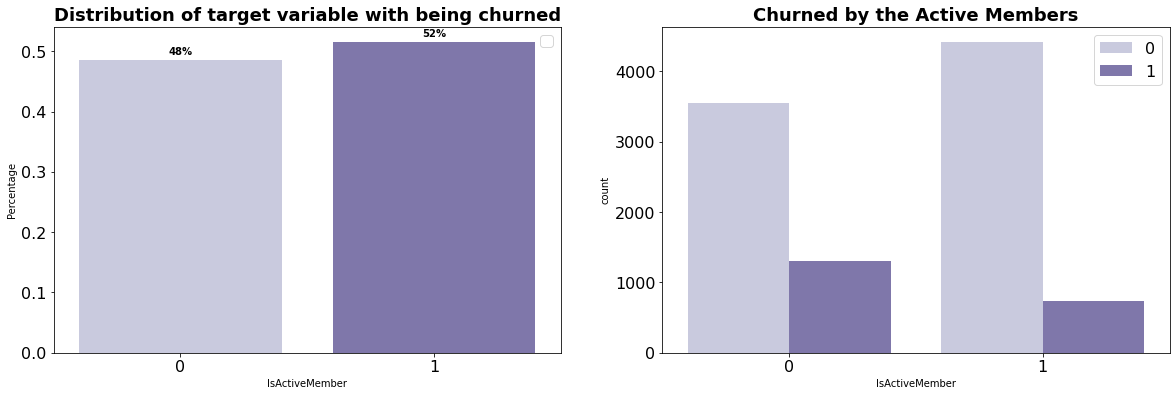

In [274]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df['IsActiveMember'].value_counts(normalize = True).rename_axis('IsActiveMember').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'IsActiveMember', y = 'Percentage', data = eda_percentage, palette = 'Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Distribution of target variable with being churned by active members', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['IsActiveMember'], hue = df['Exited'], palette = 'Purples')
plt.title('Churned by the Active Members',  fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.show()

- We wanted to check the relationship of user bing active and its being churned. We can see that almost 50% of acive members are churned and 50% are not churned.

No handles with labels found to put in legend.


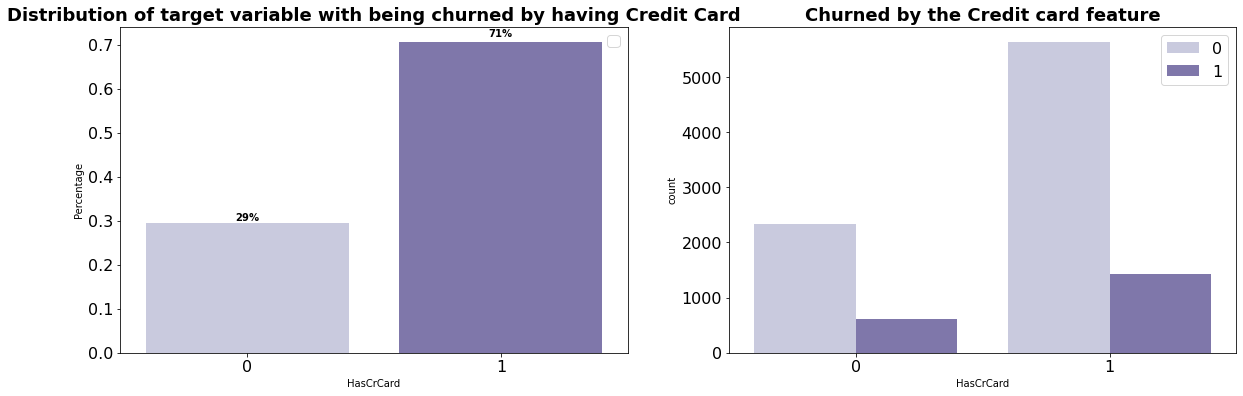

In [275]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df['HasCrCard'].value_counts(normalize = True).rename_axis('HasCrCard').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'HasCrCard', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Distribution of target variable with being churned by having Credit Card', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['HasCrCard'], hue = df['Exited'], palette='Purples')
plt.title('Churned by the Credit card feature', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

No handles with labels found to put in legend.


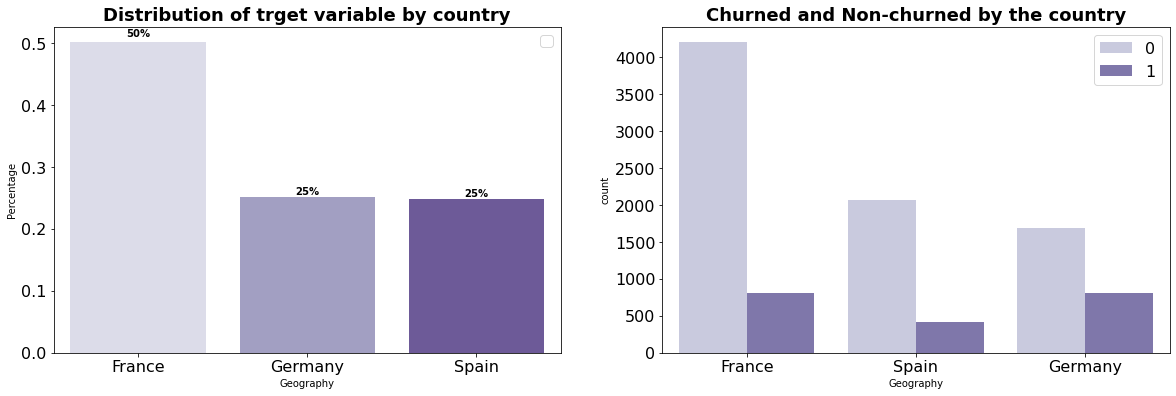

In [277]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df['Geography'].value_counts(normalize = True).rename_axis('Geography').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'Geography', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Distribution of trget variable by country', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['Geography'], hue = df['Exited'], palette='Purples')
plt.title('Churned and Non-churned by the country', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()


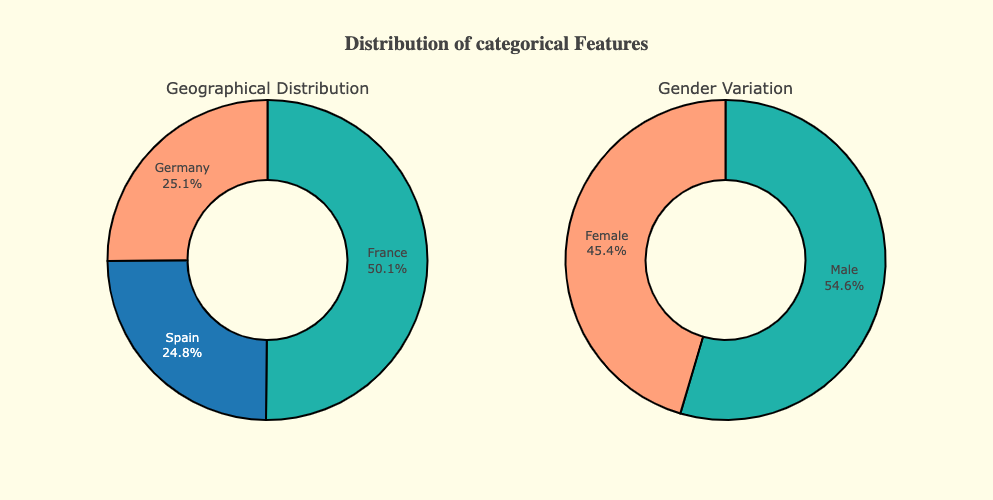

In [279]:
colors =['lightseagreen', 'lightsalmon']

# data students performance
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Geographical Distribution',
                                    'Gender Variation'),
                    specs=[[{'type':'domain'}, {'type':'domain'}],
 
                    
                          
                          ])

fig.add_trace((go.Pie(labels=df['Geography'].value_counts().keys(),
                             values=df['Geography'].value_counts().values,
                      textfont = dict(size = 16),
                     hole = .5,
                     marker=dict(colors=colors,
                                line_color = 'black',
                            line_width=3),
                      
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 1)

fig.update_traces(
    hoverinfo='label+value',
    textinfo='label+percent',
    textfont_size=12,
    marker=dict(
        colors=colors,
        line=dict(color='#000000',
                  width=2)
        )
    )



fig.add_trace((go.Pie(labels=df['Gender'].value_counts().keys(),
                             values=df['Gender'].value_counts().values,
                      textfont = dict(size = 16),
                     hole = .5,
                     marker=dict(colors=colors,
                                line_color = 'black',
                            line_width=3),
                      
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)

fig.update_traces(
    hoverinfo='label+value',
    textinfo='label+percent',
    textfont_size=12,
    marker=dict(
        colors=colors,
        line=dict(color='#000000',
                  width=2)
        )
    )
fig.layout.update(title="<b> Distribution of categorical Features <b>",
                  titlefont={'size':20, 'family': 'Serif',},
                  showlegend=False, 
                  height=500, 
                  width=1100, 
                  template=None, 
                  paper_bgcolor= '#FFFDE7',
                    plot_bgcolor= '#FFFDE7'
                 )

fig.show()
fig.write_html('category.html')

In [11]:
df = df.drop(['RowNumber','CustomerId','Surname'], axis = 1)

In [12]:
df[df['Balance']==0]['Exited'].value_counts()

0    3117
1     500
Name: Exited, dtype: int64

In [13]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Text(0.5, 1.0, 'Correlation Map')

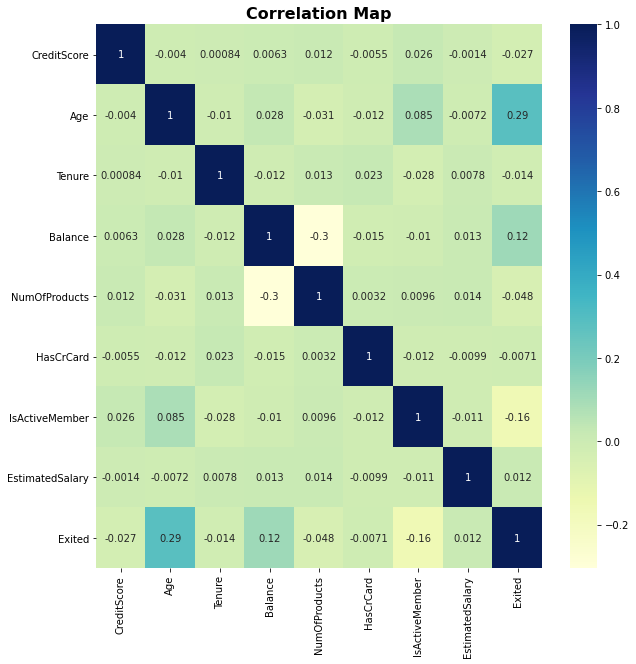

In [14]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='YlGnBu', annot = True)
plt.title("Correlation Map", fontweight = "bold", fontsize=16)

In the correlation plot, all the features have similar range of correlation. and there is no dominent feature in the dataset. So, I plan to take all the features for the modelling



In [15]:
X = df.drop(['Exited'],axis=1)
y = df['Exited']

In [16]:
from sklearn.preprocessing import OneHotEncoder

In [17]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(df[['Geography']]).toarray())
encoder_df_gender = pd.DataFrame(encoder.fit_transform(df[['Gender']]).toarray())
final_df = df.join(encoder_df)
final_df.rename(columns = {0 : 'France', 1 : 'Germany',2:'Spain'}, inplace = True)
final_df = final_df.drop('Geography',axis = 1)
final_df = final_df.join(encoder_df_gender)
final_df.rename(columns = {0 : 'Female', 1 : 'Male'}, inplace = True)
final_df = final_df.drop('Gender',axis = 1)

X_final = final_df.drop(['Exited'],axis=1)
y_final = final_df['Exited']

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X_final, y_final, test_size=0.2,random_state=42,stratify = y_final)

In [19]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)

In [264]:
final_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0,1.0,0.0


## Model 1 : Logistic Regression

In [20]:
lr = LogisticRegression()

In [21]:
parameters = {
    'penalty' : ['l1','l2','elasticnet'], 
    'C'       : [0.001,0.01,0.1,1,10,100],
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [97]:
from sklearn.metrics import accuracy_score,plot_precision_recall_curve, plot_roc_curve, ConfusionMatrixDisplay, auc, roc_auc_score, classification_report, confusion_matrix


In [32]:
X_test = ss.fit_transform(X_test)

In [33]:
clf = GridSearchCV(lr,                    # model
                   param_grid = parameters,   # hyperparameters        # metric for scoring
                   cv=15, refit = True)   
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [40]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

0.7745696389764187

In [271]:
from sklearn import metrics
from sklearn.metrics import roc_curve
import plotly.graph_objs as go

In [34]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      1891
           1       0.16      0.61      0.26       109

    accuracy                           0.81      2000
   macro avg       0.57      0.72      0.58      2000
weighted avg       0.93      0.81      0.86      2000



In [37]:
cf_matrix = confusion_matrix(y_pred,y_test)

<AxesSubplot:>

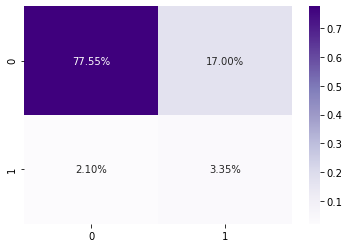

In [38]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Purples')

## Model 2 : Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rfc = RandomForestClassifier()

In [51]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [53]:
y_pred  = rfc.predict(X_test)

In [54]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.87      0.92      1759
           1       0.45      0.76      0.56       241

    accuracy                           0.86      2000
   macro avg       0.71      0.81      0.74      2000
weighted avg       0.90      0.86      0.87      2000



In [130]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [100,200,300]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [6,10,20]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [131]:
rfc_GS = GridSearchCV(rfc,                    # model
                   param_grid = random_grid,   # hyperparameters        # metric for scoring
                   cv=5, refit = True)   
rfc_GS.fit(X_train,y_train)
y_pred_rf = rfc_GS.predict(X_test)


In [152]:
roc_auc_score(y_test, rfc_GS.predict_proba(X_test)[:, 1])


0.8590778760270287

In [182]:
cr_rf = classification_report(y_pred_rf,y_test)

In [133]:
cf_matrix_rfc = confusion_matrix(y_pred_rf,y_test)

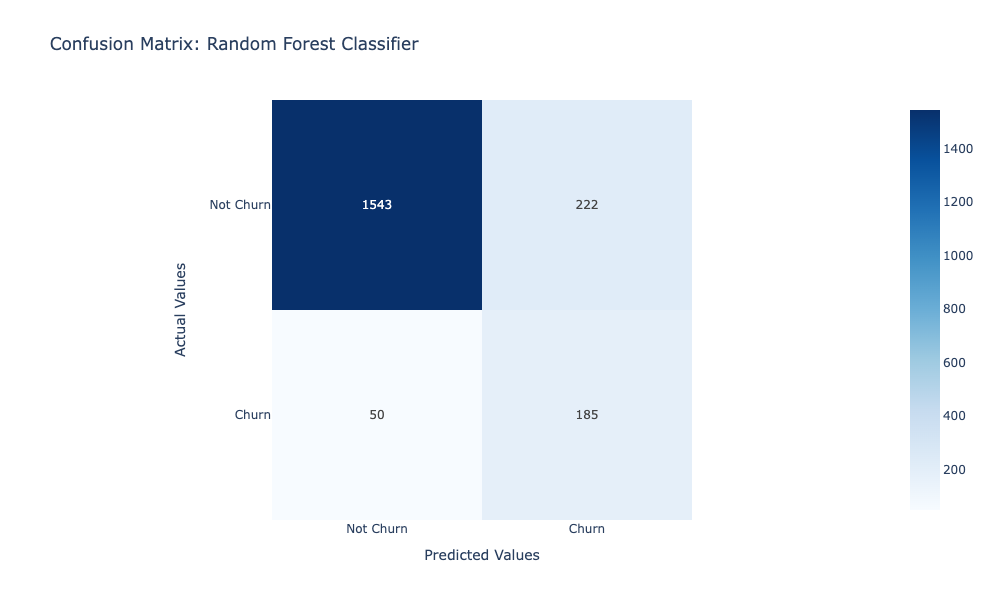

In [135]:
import plotly.express as px
data = cf_matrix_rfc
fig = px.imshow(data,text_auto=True, width=700, height=700, title="of Countries", labels=dict(x="Predicted Values", y="Actual Values"), 
                x=['Not Churn','Churn'],
                y=['Not Churn','Churn'],
                color_continuous_scale="Blues")
fig.update_layout(height=600, width=800, title_text="Confusion Matrix: Random Forest Classifier")
fig.update_xaxes(side='bottom')
fig.show()

In [136]:
# fig.write_html("rfc_cm.html")

## Model 3: Gradient Boosting Classifier

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

In [66]:
gbc = GradientBoostingClassifier()

In [67]:
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)

In [69]:
roc_auc_score(y_test, gbc.predict_proba(X_test)[:, 1])

0.8692405811049879

In [181]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.86      0.90      1779
           1       0.38      0.69      0.49       221

    accuracy                           0.84      2000
   macro avg       0.67      0.77      0.70      2000
weighted avg       0.89      0.84      0.86      2000



In [74]:
parameters = {
    "loss":["deviance"],
    "min_samples_split": [0.1, 0.25, 0.5],
    "min_samples_leaf": [0.1, 0.25, 0.5],
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8],
    'n_estimators': [100,200,300]
    }


In [75]:
gbc_ = GradientBoostingClassifier()

In [76]:
gbc_GS = GridSearchCV(gbc_,                    # model
                   param_grid = parameters,           # metric for scoring
                   cv=5, refit = True)   

In [83]:
gbc_GS.fit(X_train,y_train)
y_pred = gbc_GS.predict(X_test)

In [84]:
roc_auc_score(y_test, gbc_GS.predict_proba(X_test)[:, 1])

0.810547064784353

In [85]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.86      0.90      1779
           1       0.38      0.69      0.49       221

    accuracy                           0.84      2000
   macro avg       0.67      0.77      0.70      2000
weighted avg       0.89      0.84      0.86      2000



## Model 4: Support Vector Machine

In [154]:
from sklearn import svm
clf_svm = svm.SVC(probability = True)
clf_svm.fit(X_train, y_train)
svm_pred = clf_svm.predict(X_test)
print(classification_report(svm_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      1810
           1       0.40      0.85      0.54       190

    accuracy                           0.86      2000
   macro avg       0.69      0.86      0.73      2000
weighted avg       0.93      0.86      0.88      2000



In [155]:
roc_auc_score(y_test, clf_svm.predict_proba(X_test)[:, 1])

0.8285743370489133

In [156]:
svm_cf_matrix = confusion_matrix(svm_pred,y_test)

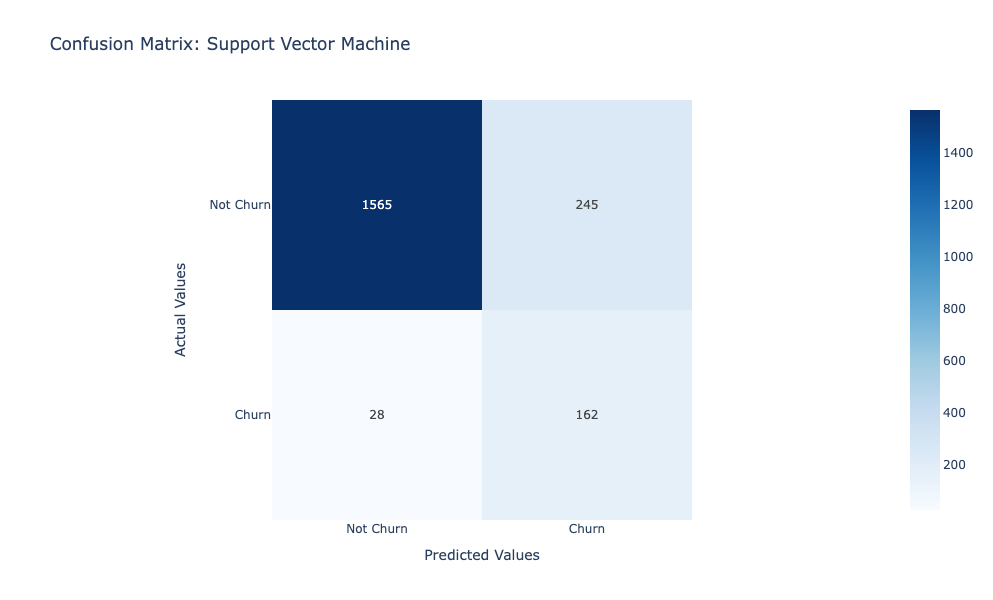

In [140]:
import plotly.express as px
data = svm_cf_matrix
fig = px.imshow(data,text_auto=True, width=700, height=700, title="of Countries", labels=dict(x="Predicted Values", y="Actual Values"), 
                x=['Not Churn','Churn'],
                y=['Not Churn','Churn'],
                color_continuous_scale="Blues")
fig.update_layout(height=600, width=800, title_text="Confusion Matrix: Support Vector Machine")
fig.update_xaxes(side='bottom')
fig.show()

In [143]:
# fig.write_html("svm_cm.html")

In [89]:
param_grid = {'C': [0.001,0.01,0.1, 1, 10],
              'gamma': [1, 0.01, 0.001],
              'kernel': ['polynomial','rbf']}
 
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)
svm_hyper_pred = clf_svm.predict(X_test)
print(classification_report(svm_hyper_pred,y_test))
roc_auc_score(y_test, svm_pred)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ............C=0.001, gamma=1, kernel=polynomial; total time=   0.0s
[CV 2/5] END ............C=0.001, gamma=1, kernel=polynomial; total time=   0.0s
[CV 3/5] END ............C=0.001, gamma=1, kernel=polynomial; total time=   0.0s
[CV 4/5] END ............C=0.001, gamma=1, kernel=polynomial; total time=   0.0s
[CV 5/5] END ............C=0.001, gamma=1, kernel=polynomial; total time=   0.0s
[CV 1/5] END ...................C=0.001, gamma=1, kernel=rbf; total time=   2.3s
[CV 2/5] END ...................C=0.001, gamma=1, kernel=rbf; total time=   2.3s
[CV 3/5] END ...................C=0.001, gamma=1, kernel=rbf; total time=   2.3s
[CV 4/5] END ...................C=0.001, gamma=1, kernel=rbf; total time=   2.3s
[CV 5/5] END ...................C=0.001, gamma=1, kernel=rbf; total time=   2.3s
[CV 1/5] END .........C=0.001, gamma=0.01, kernel=polynomial; total time=   0.0s
[CV 2/5] END .........C=0.001, gamma=0.01, kern

0.6902287495507835

## ROC AUC Curve for Model Comparison

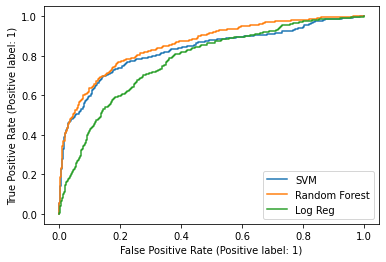

In [96]:
disp = plot_roc_curve(grid, X_test,y_test, Label = 'SVM')
plot_roc_curve(rfc_GS, X_test,y_test, ax = disp.ax_, Label = 'Random Forest');
plot_roc_curve(clf, X_test,y_test, ax = disp.ax_, Label = 'Log Reg')


## Precision_recall_curve for Model Comparison

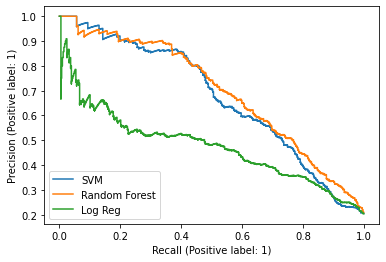

In [98]:
# plot_precision_recall_curve
disp = plot_precision_recall_curve(grid, X_test,y_test, Label = 'SVM')
plot_precision_recall_curve(rfc_GS, X_test,y_test, ax = disp.ax_, Label = 'Random Forest');
plot_precision_recall_curve(clf, X_test,y_test, ax = disp.ax_, Label = 'Log Reg')


In [101]:
final_df_columns = final_df.columns

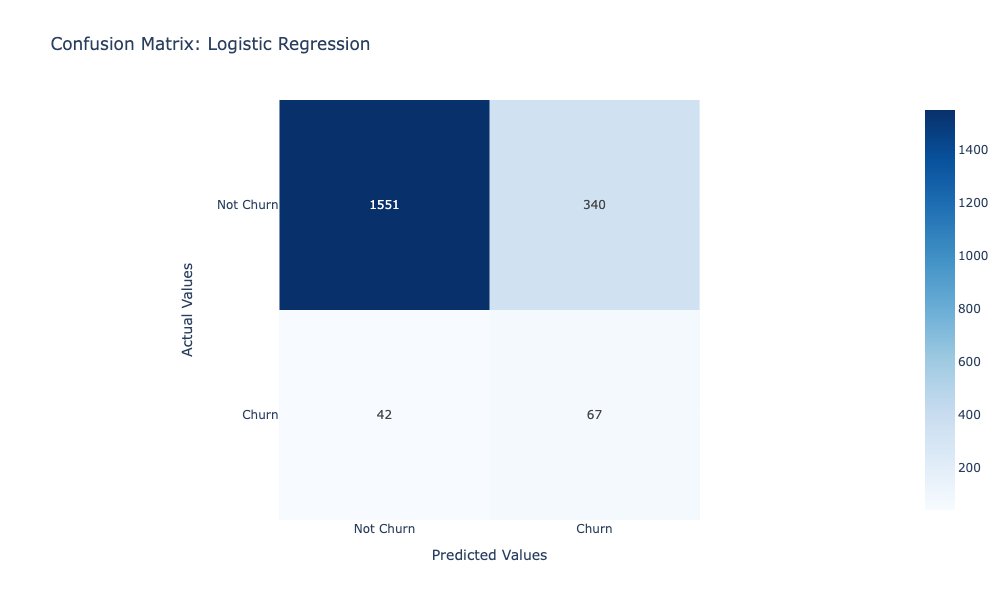

In [141]:
import plotly.express as px
data = cf_matrix
fig = px.imshow(data,text_auto=True, width=700, height=700, title="of Countries", labels=dict(x="Predicted Values", y="Actual Values"), 
                x=['Not Churn','Churn'],
                y=['Not Churn','Churn'],
                color_continuous_scale="Blues")
fig.update_layout(height=600, width=800, title_text="Confusion Matrix: Logistic Regression")
fig.update_xaxes(side='bottom')
fig.show()

## Classification Report

In [183]:
print('                  Logistic Regression')
print()
print(classification_report(y_pred,y_test))
print("                 Random Forest Classifier")
print()
print(cr_rf)
print("                  Support Vector Machine")
print()
print(classification_report(svm_pred,y_test))

                  Logistic Regression

              precision    recall  f1-score   support

           0       0.96      0.86      0.90      1779
           1       0.38      0.69      0.49       221

    accuracy                           0.84      2000
   macro avg       0.67      0.77      0.70      2000
weighted avg       0.89      0.84      0.86      2000

                 Random Forest Classifier

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1765
           1       0.45      0.79      0.58       235

    accuracy                           0.86      2000
   macro avg       0.71      0.83      0.75      2000
weighted avg       0.91      0.86      0.88      2000

                  Support Vector Machine

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      1810
           1       0.40      0.85      0.54       190

    accuracy                           0.86      2000
   m

## Model Evaluation using Plotly

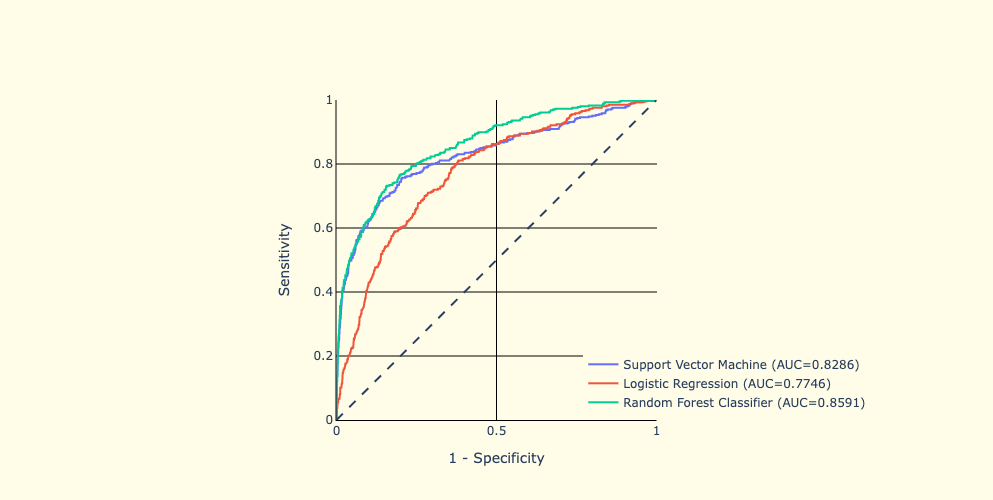

In [268]:
fpr, tpr, thresholds = roc_curve(y_test,  clf_svm.predict_proba(X_test)[:, 1])
fpr1, tpr1, thresholds1 = roc_curve(y_test,  clf.predict_proba(X_test)[:, 1])
fpr2, tpr2, thresholds2 = roc_curve(y_test,  rfc_GS.predict_proba(X_test)[:, 1])

# kind = 'val'
# c_fill      = 'rgba(52, 152, 219, 0.2)'
# c_line      = 'rgba(52, 152, 219, 0.5)'
# c_line_main = 'rgba(41, 128, 185, 1.0)'
# c_grid      = 'rgba(189, 195, 199, 0.5)'
# c_annot     = 'rgba(149, 165, 166, 0.5)'
# c_highlight = 'rgba(192, 57, 43, 1.0)'


fig = go.Figure([
    go.Scatter(
        x          = fpr,
        y          = tpr,
#         line       = dict(color=c_line, width=1),
#         hoverinfo  = "skip",
        showlegend = True,
        name       = f'Support Vector Machine (AUC={auc(fpr, tpr):.4f})'),
    go.Scatter(
        x          = fpr1,
        y          = tpr1,
#         fill       = 'tonexty',
#         fillcolor  = c_fill,
#         line       = dict(color=c_line, width=1),
#         hoverinfo  = "skip",
        showlegend = True,
        name       = f'Logistic Regression (AUC={auc(fpr1, tpr1):.4f})'),
    go.Scatter(
        x          = fpr2,
        y          = tpr2,
#         line       = dict(color=c_line_main, width=2),
#         hoverinfo  = "skip",
        showlegend = True,
        name       = f'Random Forest Classifier (AUC={auc(fpr2, tpr2):.4f})')
])
fig.add_shape(
    type ='line', 
    line =dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)
fig.update_layout(
    template    = 'plotly_white', 
    title_x     = 0.5,
    xaxis_title = "1 - Specificity",
    yaxis_title = "Sensitivity",
    width       = 500,
    height      = 500,
        paper_bgcolor= '#FFFDE7',
    plot_bgcolor= '#FFFDE7',
    legend      = dict(
        yanchor="bottom", 
        xanchor="right", 
        x=0.95,
        y=0.01,
    )
)
fig.update_yaxes(
    range       = [0, 1],
    gridcolor   = 'black',
    scaleanchor = "x", 
    scaleratio  = 1,
    linecolor   = 'black')
fig.update_xaxes(
    range       = [0, 1],
    gridcolor   = 'black',
    constrain   = 'domain',
    linecolor   = 'black')
# fig.write_html('auc_roc1.html')

In [238]:
from sklearn.metrics import precision_recall_curve, f1_score

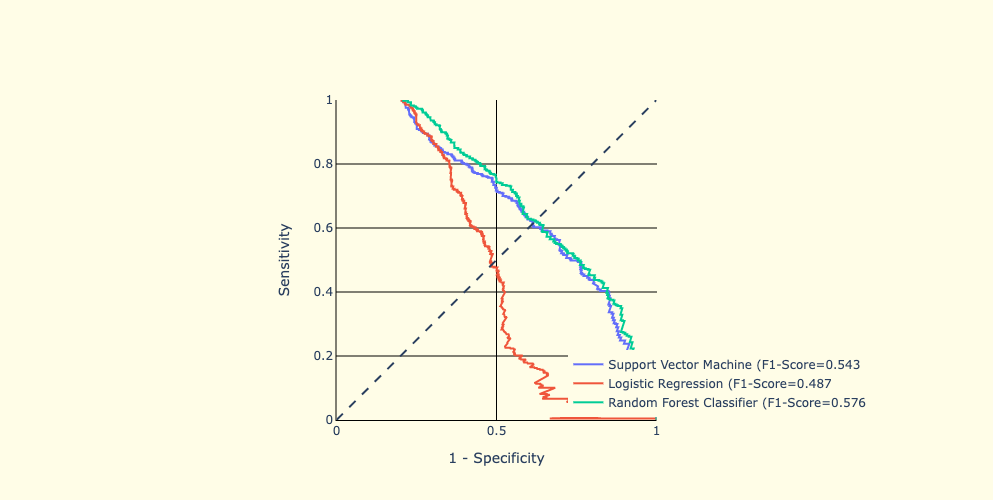

In [269]:
fpr, tpr, thresholds = precision_recall_curve(y_test,  clf_svm.predict_proba(X_test)[:, 1])


## Conclusion

In conclusion, focusing more on the recall, SVM clearly performed the best on our dataset for predicting If customer is going to churn or not. In terms of important features, I used all the features s In the above correlation map, I didn't saw any specific feature with high correlation with the target variable or multicollinearity in the data.

There could be multiple reason of churn in a customer like sqitching to the conpetitor, missing functionality, Poor customer fit, etc. If possible we can explore more and add the data where we could find the reason of the churn and then perform Descriptive Data Analysis for more information and insights about the customers in an organization